In [1]:
from diffusers import StableDiffusionPipeline
import torch

C:\Users\archi\Documents\Diffusers\Lib\site-packages\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [27]:
# Setup important variables
# -------------------------
modelsDir = "C:/Users/archi/Documents/Fooocus/Fooocus/models/checkpoints/"
positivePrompt = "instagram photo, closeup face photo of 23 y.o indian lady in black sweater, pale skin, (smile:0.4), hard shadows, in a park"
negativePrompt = "deformed body, bad face, nsfw, realistic, japanese, chinese, watermarks, logos"
seed = torch.Generator("cuda").manual_seed(33285)
heightOfImage = 768
widthOfImage = 512
guidanceScale = 4
numOfSteps = 25

In [3]:
# Generate sd15Pipeline
# -----------------

sd15Pipe = StableDiffusionPipeline.from_single_file(
    pretrained_model_link_or_path=modelsDir+"realisticVisionV60B1_v51VAE.safetensors",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True).to("cuda")


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [28]:
# Set the variables into the pipeline
# -----------------------------------
image = sd15Pipe(
    positivePrompt,
    num_inference_steps=numOfSteps,
    negative_prompt=negativePrompt,
    height=heightOfImage,
    width=widthOfImage,
    guidance_scale=guidanceScale,
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

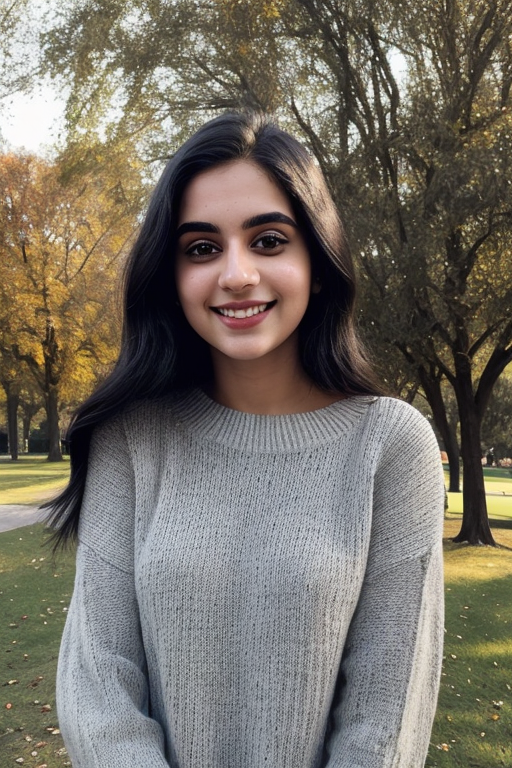

In [29]:
display(image)
image.save("sd15.png")